# 14주 이진  베이지안 모델

Sklearn의 make_classification() 함수는 분류에 쓰일 수 있는 데이터를 생성해준다.

- (1) X, Y 데이터를 생성

In [25]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

X[:5], Y[:5]

(array([[-1.6228869 , -0.41873507],
        [ 0.95263805, -0.9978225 ],
        [ 1.35658311,  1.0156802 ],
        [-0.51685048,  1.39531778],
        [-0.71089045,  1.00306258]]),
 array([0, 1, 1, 0, 0]))

- (2) X의 평균과 표준편차 계산해서 출력

In [26]:
X.mean(), X.std()

(0.03398877643332079, 1.1514909218574887)

- (3) 그래프 작성

    * scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.



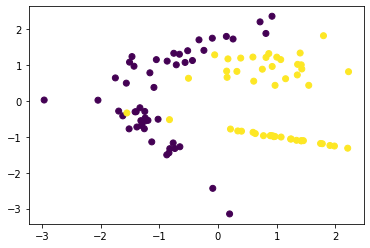

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
plt.show()

- (4) 훈련 데이터, 테스트 데이터 3:1로 분리

    * train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.



In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

- (5) 훈련 데이터에 대하여 BernoulliNB 모델링
    * X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.



In [29]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)

- (6) 테스트 데이터에 대하여 예측값을 출력
    * 예측이 맞는지 실제값 Y와 비교해보자.

- 3개가 틀렸다.
    $1 - \frac{3}{25} = 0.88$

In [33]:
bnb.fit(X_train, Y_train)

pred = bnb.predict(X_test)
print(len(pred))
list(zip(pred, Y_test))

25


[(0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0)]

- (7) 테스트 데이터에 대하여 예측과 실제의 정확성 출력

- 위에서 계산했던 값과 일치한다.

In [34]:
bnb.score(X_test, Y_test)

0.88